In [1]:
%matplotlib notebook
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import random

In [3]:
def get_data_from_mat(file_path, type='pre_pn'):
    data = scipy.io.loadmat(file_path)
    duration = []
    amp = []
    pre_pn = []
    pre_itn = []
    pre_aff = []
    pre_point_exc = []
    pre_point_inh = []


    for i in range(1, data['info_collect'].shape[0]):
        duration.append(data['info_collect'][i][0])
        amp.append(data['info_collect'][i][1])
        pre_pn.append(data['info_collect'][i][2])
        pre_itn.append(data['info_collect'][i][3])
        pre_aff.append(data['info_collect'][i][4])
        pre_point_exc.append(data['info_collect'][i][5])
        pre_point_inh.append(data['info_collect'][i][6])
        
    

    full_data = np.concatenate((pre_pn, pre_itn, pre_aff, pre_point_exc, pre_point_inh), axis=2)
    full_labels = np.concatenate((amp, duration), axis=2)
    
    x = full_labels[:,:,0]
    normalized_amp = (x-min(x))/(max(x)-min(x))
    full_labels[:,:,0] = normalized_amp
    
    x = full_labels[:,:,1]
    normalized_duration = (x-min(x))/(max(x)-min(x))
    full_labels[:,:,1] = normalized_duration
    
    for i in range(full_labels.shape[0]):
        for j in range(5):
            x = full_data[i,:,j]
            full_data[i,:,j] = (x - np.min(x))/(np.max(x)-np.min(x))

    return full_data, full_labels

<IPython.core.display.Javascript object>


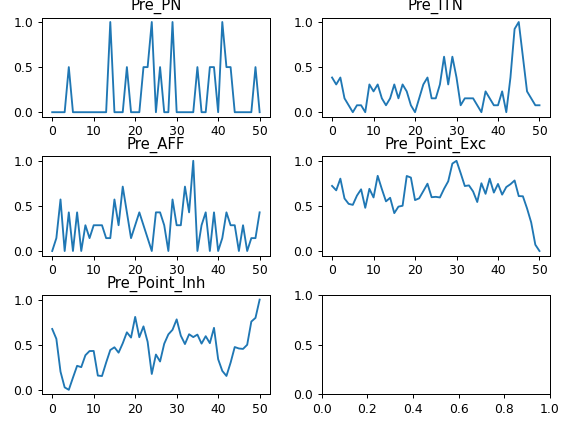

Amps: 0.47026970232164567
Duration: 0.35714285714285715


In [4]:
data, labels = get_data_from_mat('data/info_collect_for_NN_network_cycle.mat')
time_s = np.arange(data.shape[1])
sample = 0
fig, axs = plt.subplots(3,2)
fig.tight_layout()
axs[0,0].plot(time_s, data[sample,:,0])
axs[0,0].set_title('Pre_PN')
axs[0,1].plot(time_s, data[sample,:,1])
axs[0,1].set_title('Pre_ITN')
axs[1,0].plot(time_s, data[sample,:,2])
axs[1,0].set_title('Pre_AFF')
axs[1,1].plot(time_s, data[sample,:,3])
axs[1,1].set_title('Pre_Point_Exc')
axs[2,0].plot(time_s, data[sample,:,4])
axs[2,0].set_title('Pre_Point_Inh')

plt.show()
print("Amps: {}".format(labels[sample,0,0]))
print("Duration: {}".format(labels[sample,0,1]))

<IPython.core.display.Javascript object>


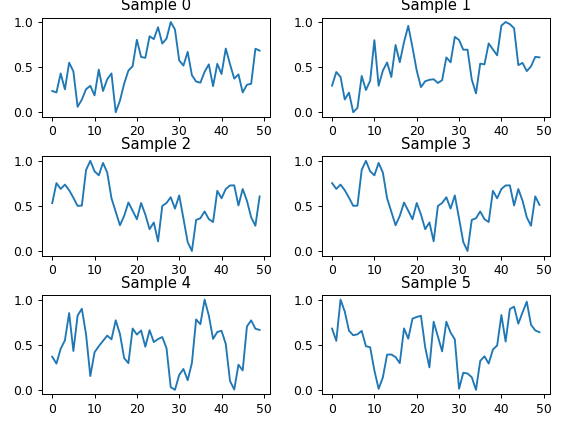

In [5]:
data, labels = get_data_from_mat('data/new_bursts.mat')
time_s = np.arange(data.shape[1])
sample = 0
feature = 3
fig, axs = plt.subplots(3,2)
fig.tight_layout()
axs[0,0].plot(time_s, data[sample,:,feature])
axs[0,0].set_title('Sample 0')
axs[0,1].plot(time_s, data[sample+1,:,feature])
axs[0,1].set_title('Sample 1')
axs[1,0].plot(time_s, data[sample+2,:,feature])
axs[1,0].set_title('Sample 2')
axs[1,1].plot(time_s, data[sample+3,:,feature])
axs[1,1].set_title('Sample 3')
axs[2,0].plot(time_s, data[sample+4,:,feature])
axs[2,0].set_title('Sample 4')
axs[2,1].plot(time_s, data[sample+5,:,feature])
axs[2,1].set_title('Sample 5')

plt.show()